# Bayes Classifier
### A Amar Rohith
### EC21B1106

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

1.	Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2).
ω1 = [1,6; 3,4; 3,8; 5,6]
ω2 = [3,0; 1,-2;3,-4;5,-2]


In [2]:
Df1=pd.DataFrame({"Feature1":[1,3,3,5],"Feature2":[6,4,8,6]})
Df2=pd.DataFrame({"Feature1":[3,1,3,5],"Feature2":[0,-2,-4,-2]})
print(Df1,Df2,sep='\n')

   Feature1  Feature2
0         1         6
1         3         4
2         3         8
3         5         6
   Feature1  Feature2
0         3         0
1         1        -2
2         3        -4
3         5        -2


In [3]:
f1_mean_w1=Df1['Feature1'].mean()
f2_mean_w1=Df1['Feature2'].mean()
Df1['Feature1']=Df1['Feature1']-f1_mean_w1
Df1['Feature2']=Df1['Feature2']-f2_mean_w1
print(Df1)

   Feature1  Feature2
0      -2.0       0.0
1       0.0      -2.0
2       0.0       2.0
3       2.0       0.0


In [4]:
Z_w1=Df1.to_numpy()
cov_matrix_w1=Z_w1.T.dot(Z_w1)
print(cov_matrix_w1)

[[8. 0.]
 [0. 8.]]


In [5]:
f1_mean_w2=Df2['Feature1'].mean()
f2_mean_w2=Df2['Feature2'].mean()
Df2['Feature1']=Df2['Feature1']-f1_mean_w2
Df2['Feature2']=Df2['Feature2']-f2_mean_w2
print(Df2)

   Feature1  Feature2
0       0.0       2.0
1      -2.0       0.0
2       0.0      -2.0
3       2.0       0.0


In [6]:
Z_w2=Df2.to_numpy()
cov_matrix_w2=Z_w2.T.dot(Z_w2)
print(cov_matrix_w2)

[[8. 0.]
 [0. 8.]]


# Comment: we see that its case 1 since cov_matrix_w1==cov_matrix_w2 and sigmas are equal

In [7]:
invmat=np.linalg.inv(cov_matrix_w1)
mu1=np.array([[f1_mean_w1,f2_mean_w1]])
w1=invmat.dot(mu1.T)
w1_=-(1/2)*mu1.dot(invmat).dot(mu1.T)

mu2=np.array([[f1_mean_w2,f2_mean_w2]])
w2=invmat.dot(mu2.T)
w2_=-(1/2)*mu2.dot(invmat).dot(mu2.T)

w=w1-w2
w_=w1_-w2_

def g(x, y):
    return w[0] * x + w[1] * y + w_


plotting

In [8]:
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-20, 20, 400)
X,Y=np.meshgrid(x_vals,y_vals)

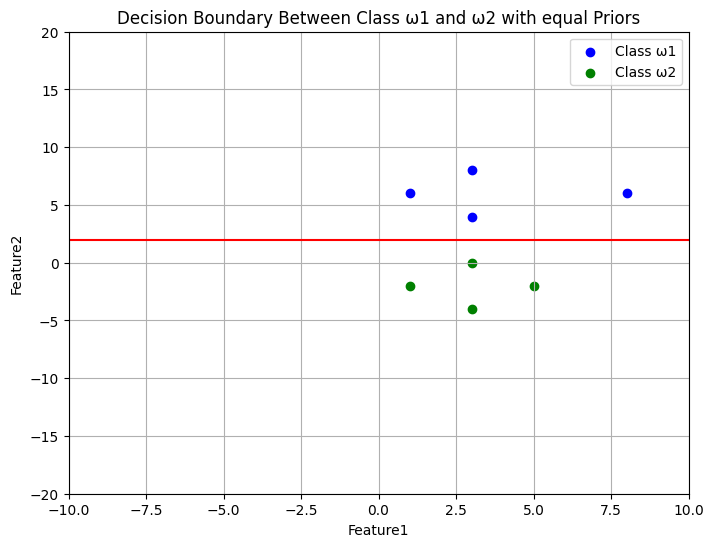

In [9]:
Z = g(X, Y)
plt.figure(figsize=(8, 6))
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title('Decision Boundary Between Class ω1 and ω2 with equal Priors')
plt.grid(True)

plt.contour(X, Y, Z, levels=[0], colors='red')
plt.scatter([1, 3, 3, 8], [6, 4, 8, 6], color='blue', label='Class ω1')
plt.scatter([3, 1, 3, 5], [0, -2, -4, -2], color='green', label='Class ω2')
plt.legend()
plt.show()

2.	Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) =0.3; P(ω2)=0.7
ω1 = [1,-1; 2,-5; 3,-6; 4,-10; 5,-12; 6,-15]
ω2 = [-1,1; -2,5; -3,6; -4,10, -5,12; -6, 15]



In [10]:
w1 = np.array([[1, -1], [2, -5], [3, -6], [4, -10], [5, -12], [6, -15]])
w2 = np.array([[-1, 1], [-2, 5], [-3, 6], [-4, 10], [-5, 12], [-6, 15]])
P_w1 = 0.3
P_w2 = 0.7

In [11]:
mu1 = np.mean(w1, axis=0)
mu2 = np.mean(w2, axis=0)

In [12]:
cov_w1 = np.cov(w1.T)
cov_w2 = np.cov(w2.T)

In [13]:
inv_cov_w1 = np.linalg.inv(cov_w1)
inv_cov_w2 = np.linalg.inv(cov_w2)
det_cov_w1 = np.linalg.det(cov_w1)
det_cov_w2 = np.linalg.det(cov_w2)

In [14]:
def g1(x, y):
    point = np.array([x, y])
    diff1 = point - mu1
    term1 = -0.5 * np.dot(np.dot(diff1.T, inv_cov_w1), diff1)
    term2 = -0.5 * np.log(det_cov_w1)
    term3 = np.log(P_w1)
    return term1 + term2 + term3

In [15]:
def g2(x, y):
    point = np.array([x, y])
    diff2 = point - mu2
    term1 = -0.5 * np.dot(np.dot(diff2.T, inv_cov_w2), diff2)
    term2 = -0.5 * np.log(det_cov_w2)
    term3 = np.log(P_w2)
    return term1 + term2 + term3


In [16]:
def decision_boundary(x, y):
    return g1(x, y) - g2(x, y)

In [17]:
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-20, 20, 400)
X, Y = np.meshgrid(x_vals, y_vals)

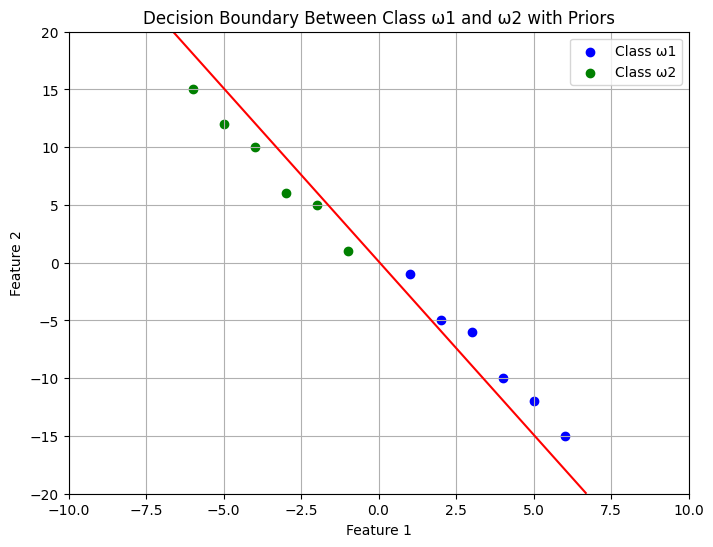

In [18]:
Z = np.array([[decision_boundary(x, y) for x in x_vals] for y in y_vals])
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=[0], colors='red')
plt.scatter(w1[:, 0], w1[:, 1], color='blue', label='Class ω1')
plt.scatter(w2[:, 0], w2[:, 1], color='green', label='Class ω2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary Between Class ω1 and ω2 with Priors')
plt.grid(True)
plt.show()

3.	Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2).
ω1 = [2,6; 3,4; 3,8; 4,6]
ω2 = [3,0; 1,-2; 3,-4; 5,-2]


In [19]:
w1 = np.array([[2, 6], [3, 4], [3, 8], [4, 6]])
w2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])
mu1 = np.mean(w1, axis=0)
mu2 = np.mean(w2, axis=0)
cov_w1 = np.cov(w1.T)
cov_w2 = np.cov(w2.T)
inv_cov_w1 = np.linalg.inv(cov_w1)
inv_cov_w2 = np.linalg.inv(cov_w2)
det_cov_w1 = np.linalg.det(cov_w1)
det_cov_w2 = np.linalg.det(cov_w2)

In [20]:
def g1(x, y):
    point = np.array([x, y])
    diff1 = point - mu1
    term1 = -0.5 * np.dot(np.dot(diff1.T, inv_cov_w1), diff1)
    term2 = -0.5 * np.log(det_cov_w1)
    return term1 + term2

In [21]:
def g2(x, y):
    point = np.array([x, y])
    diff2 = point - mu2
    term1 = -0.5 * np.dot(np.dot(diff2.T, inv_cov_w2), diff2)
    term2 = -0.5 * np.log(det_cov_w2)
    return term1 + term2

In [22]:
def decision_boundary(x, y):
    return g1(x, y) - g2(x, y)

In [23]:
x_vals = np.linspace(-2, 7, 400)
y_vals = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)


In [24]:
Z = np.array([[decision_boundary(x, y) for x in x_vals] for y in y_vals])

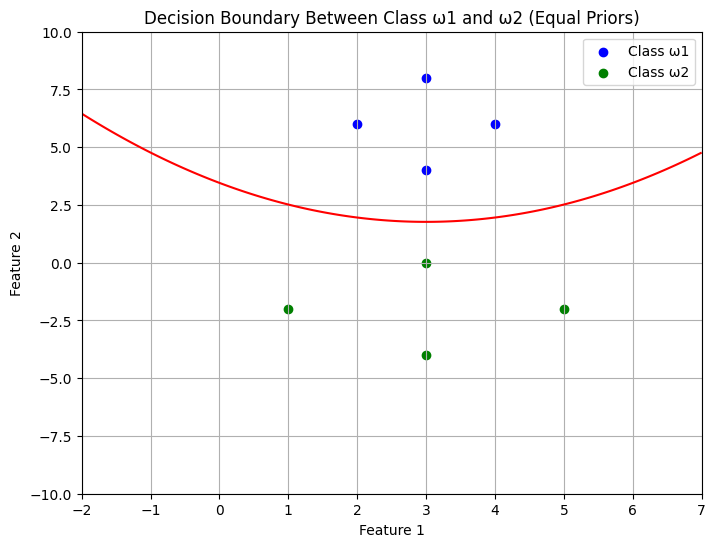

In [25]:
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=[0], colors='red')
plt.scatter(w1[:, 0], w1[:, 1], color='blue', label='Class ω1')
plt.scatter(w2[:, 0], w2[:, 1], color='green', label='Class ω2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary Between Class ω1 and ω2 (Equal Priors)')
plt.grid(True)
plt.show()

Dataset Specifications:
Total number of samples = 150
Number of classes = 3 (Iris setosa, Iris virginica, and Iris versicolor)
Number of samples in each class = 50
Use the following information to design classifier:
Number of training feature vectors ( first 40 in each class) = 40
Number of test feature vectors ( remaining 10 in each class) = 10
Number of dimensions = 4
Feature vector = <sepal length, sepal width, petal length, petal width>
Use only two features: Petal Length and Petal Width, for 3 class classification and draw the decision boundary between them (2 dimension, 3 regions also called as multi-class problem)


In [26]:
Df=pd.read_csv("iris.csv")
setosa=Df.loc[Df['Species']=='Iris-setosa'].drop(['SepalWidthCm','SepalLengthCm','Id','Species'],axis=1)
virginica=Df.loc[Df['Species']=='Iris-virginica'].drop(['SepalWidthCm','SepalLengthCm','Id','Species'],axis=1)
versicolor=Df.loc[Df['Species']=='Iris-versicolor'].drop(['SepalWidthCm','SepalLengthCm','Id','Species'],axis=1)

print(setosa)
print(virginica)
print(versicolor)
setosa = setosa.head(40).to_numpy()
virginica = virginica.head(40).to_numpy()
versicolor = versicolor.head(40).to_numpy()

    PetalLengthCm  PetalWidthCm
0             1.4           0.2
1             1.4           0.2
2             1.3           0.2
3             1.5           0.2
4             1.4           0.2
5             1.7           0.4
6             1.4           0.3
7             1.5           0.2
8             1.4           0.2
9             1.5           0.1
10            1.5           0.2
11            1.6           0.2
12            1.4           0.1
13            1.1           0.1
14            1.2           0.2
15            1.5           0.4
16            1.3           0.4
17            1.4           0.3
18            1.7           0.3
19            1.5           0.3
20            1.7           0.2
21            1.5           0.4
22            1.0           0.2
23            1.7           0.5
24            1.9           0.2
25            1.6           0.2
26            1.6           0.4
27            1.5           0.2
28            1.4           0.2
29            1.6           0.2
30      

In [27]:
setosa_mu=setosa.mean(axis=0)
versicolor_mu=versicolor.mean(axis=0)
virginica_mu=virginica.mean(axis=0)


cov_setosa=np.cov(setosa.T)
cov_versicolor=np.cov(versicolor.T)
cov_virginica=np.cov(virginica.T)

print(cov_setosa,cov_versicolor,cov_virginica,sep='\n') #-> case 3

inv_cov_w1 = np.linalg.inv(cov_setosa)
inv_cov_w2 = np.linalg.inv(cov_versicolor)
inv_cov_w3 = np.linalg.inv(cov_virginica)
det_cov_w1 = np.linalg.det(cov_setosa)
det_cov_w2 = np.linalg.det(cov_versicolor)
det_cov_w3 = np.linalg.det(cov_virginica)


[[0.02958333 0.00458333]
 [0.00458333 0.00994231]]
[[0.20353205 0.07371795]
 [0.07371795 0.04307692]]
[[0.34532692 0.05930769]
 [0.05930769 0.07425641]]


In [28]:
def g1(x, y):
    point = np.array([x, y])
    diff1 = point - setosa_mu
    term1 = -0.5 * np.dot(np.dot(diff1.T, inv_cov_w1), diff1)
    term2 = -0.5 * np.log(det_cov_w1)
    return term1 + term2

In [29]:
def g2(x, y):
    point = np.array([x, y])
    diff2 = point - versicolor_mu
    term1 = -0.5 * np.dot(np.dot(diff2.T, inv_cov_w2), diff2)
    term2 = -0.5 * np.log(det_cov_w2)
    return term1 + term2

In [30]:
def g3(x, y):
    point = np.array([x, y])
    diff3 = point - virginica_mu
    term1 = -0.5 * np.dot(np.dot(diff3.T, inv_cov_w3), diff3)
    term2 = -0.5 * np.log(det_cov_w3)
    return term1 + term2

In [31]:
def decision_boundary(x, y):
    g1_value = g1(x, y)
    g2_value = g2(x, y)
    g3_value = g3(x, y)
    if g1_value > g2_value and g1_value > g3_value:
        return 1  
    elif g2_value > g1_value and g2_value > g3_value:
        return 2  
    else:
        return 3  

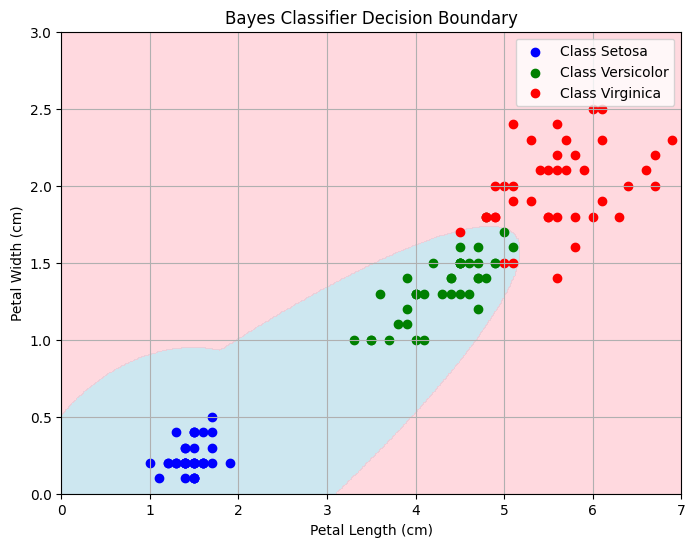

In [32]:
x_vals = np.linspace(0, 7, 400)
y_vals = np.linspace(0, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)


Z = np.array([[decision_boundary(x, y) for x in x_vals] for y in y_vals])


plt.figure(figsize=(8, 6))


plt.contourf(X, Y, Z, levels=[1, 2, 3], colors=['lightblue', 'pink', 'black'], alpha=0.6)


plt.scatter(setosa[:, 0], setosa[:, 1], color='blue', label='Class Setosa')
plt.scatter(versicolor[:, 0], versicolor[:, 1], color='green', label='Class Versicolor')
plt.scatter(virginica[:, 0], virginica[:, 1], color='red', label='Class Virginica')


plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.title('Bayes Classifier Decision Boundary')
plt.grid(True)
plt.show()

In [33]:
setosa_test=Df.loc[Df['Species']=='Iris-setosa'].drop(['SepalWidthCm','SepalLengthCm','Id','Species'],axis=1).tail(10).to_numpy()
virginica_test=Df.loc[Df['Species']=='Iris-virginica'].drop(['SepalWidthCm','SepalLengthCm','Id','Species'],axis=1).tail(10).to_numpy()
versicolor_test=Df.loc[Df['Species']=='Iris-versicolor'].drop(['SepalWidthCm','SepalLengthCm','Id','Species'],axis=1).tail(10).to_numpy()



In [34]:
test_data = np.vstack((setosa_test, versicolor_test, virginica_test))
predictions = []
dict={1:'Iris-setosa',2:'Iris-versicolor',3:'Iris-virginica'}

for point in test_data:
    pred_class = decision_boundary(point[0], point[1])
    predictions.append(dict[pred_class])


true_classes = ['Iris-setosa'] * 10 + ['Iris-versicolor'] * 10 + ['Iris-virginica'] * 10


accuracy = np.mean(np.array(predictions) == np.array(true_classes)) * 100


for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: Predicted class: {pred}, True class: {true_classes[i]}")

print(f"\nAccuracy: {accuracy:.2f}%")

Sample 1: Predicted class: Iris-setosa, True class: Iris-setosa
Sample 2: Predicted class: Iris-setosa, True class: Iris-setosa
Sample 3: Predicted class: Iris-setosa, True class: Iris-setosa
Sample 4: Predicted class: Iris-setosa, True class: Iris-setosa
Sample 5: Predicted class: Iris-setosa, True class: Iris-setosa
Sample 6: Predicted class: Iris-setosa, True class: Iris-setosa
Sample 7: Predicted class: Iris-setosa, True class: Iris-setosa
Sample 8: Predicted class: Iris-setosa, True class: Iris-setosa
Sample 9: Predicted class: Iris-setosa, True class: Iris-setosa
Sample 10: Predicted class: Iris-setosa, True class: Iris-setosa
Sample 11: Predicted class: Iris-versicolor, True class: Iris-versicolor
Sample 12: Predicted class: Iris-versicolor, True class: Iris-versicolor
Sample 13: Predicted class: Iris-versicolor, True class: Iris-versicolor
Sample 14: Predicted class: Iris-versicolor, True class: Iris-versicolor
Sample 15: Predicted class: Iris-versicolor, True class: Iris-versi

5.	Consider the 128- dimensional feature vectors given in the “face feature vectors.csv” file.
Dataset Specifications:
Total number of samples = 800
Number of classes = 2 ( labeled as “male” and “female”)
Samples from “1 to 400” belongs to class “male”
Samples from “401 to 800” belongs to class “female”
Number of samples per class = 400

Use the following information to design classifier:
Number of test samples ( last 5 in each class) = 5
Number of training samples ( remaining 395 in each class) = 395
Number of dimensions = 128


In [35]:
df=pd.read_csv("face_feature_vectors.csv")
df.rename(columns={"Unnamed: 1":"Gender"},inplace=True)
w1=df.loc[df["Gender"]=="male"].drop(["Gender","Unnamed: 0"],axis=1).head(395).to_numpy()
w2=df.loc[df['Gender']=="female"].drop(["Gender","Unnamed: 0"],axis=1).head(395).to_numpy()

mu1 = np.mean(w1, axis=0)
mu2 = np.mean(w2, axis=0)
cov_w1 = np.cov(w1.T)+ np.eye(w1.shape[1]) * 1e-2
cov_w2 = np.cov(w2.T)+ np.eye(w2.shape[1]) * 1e-2
inv_cov_w1 = np.linalg.inv(cov_w1)
inv_cov_w2 = np.linalg.inv(cov_w2)
det_cov_w1 = np.linalg.det(cov_w1)
det_cov_w2 = np.linalg.det(cov_w2)

print(det_cov_w1)
#print(cov_w1,cov_w2,sep='\n')

4.4031902952598845e-247


In [36]:
def g1(point):
    diff1 = point - mu1
    term1 = -0.5 * np.dot(np.dot(diff1.T, inv_cov_w1), diff1)
    term2 = -0.5 * np.log(det_cov_w1)
    return term1 + term2

In [37]:
def g2(point):
    diff2 = point - mu2
    term1 = -0.5 * np.dot(np.dot(diff2.T, inv_cov_w2), diff2)
    term2 = -0.5 * np.log(det_cov_w2)
    return term1 + term2

In [38]:
def decision_boundary(point):
    return "male" if g1(point) > g2(point) else "female"

In [39]:
test1=df.loc[df["Gender"]=="male"].drop(["Gender","Unnamed: 0"],axis=1).tail(5).to_numpy()
test2=df.loc[df["Gender"]=="male"].drop(["Gender","Unnamed: 0"],axis=1).tail(5).to_numpy()
test=np.vstack([test1,test2])
print(test.shape)



(10, 128)


In [41]:
true_values=["male"]*5+['female']*5
pred=[decision_boundary(point) for point in test]
accuracy=np.mean(np.array(pred)==np.array(true_values))*100
print(accuracy)

50.0
